# Gradient calculation by order of scattering
This notebook looks at the difficulties involved in using forward-adjoint theory to compute the gradient.  One primary difficulty is the singularities that are present in the adjoint source functions, i.e. the satellite measurements.  Here we consider detectors with a finite solid angle of view, but a singular location that is far above the top of the domain. 

When these adjoint sources are streamed through the domain, we see that each pixel adds a cone of delta functions to the direct term in the adjoint stokes vector solution.  

In [1]:
%matplotlib inline

import matplotlib 
import scipy as sp
import matplotlib.pyplot as plt


In [36]:

# Domain 
NX = 20
XMIN = 0.
XMAX = 50.
NZ = 3
ZMIN = 0.
ZMAX = 10.

# Plotting parameters
WIDTH = 0.004

# Sun parameters
SZA = sp.pi / 8.0
VZSUN = -sp.cos(SZA)
VXSUN = -sp.sin(SZA)

# Detector parameters
DET_EPS = 0.025
DET_X = sp.linspace(2.5, 18, 3)
DET_Z = 25 * sp.ones_like(DET_X)
COLLOC_X = 30. 
COLLOC_Z = 3.0




In [37]:
# define the spatial grid
x = sp.linspace(XMIN, XMAX, NX)
z = sp.linspace(ZMIN, ZMAX, NZ)
xx, zz = sp.meshgrid(x, z)


([<matplotlib.axis.XTick at 0x7fc1698a7bd0>,
 <a list of 2 Text xticklabel objects>)

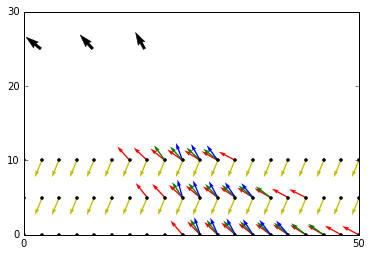

In [38]:

# define the directional sensitivity of a detector
px = DET_X #sp.linspace(5, 20, 3)
pz = DET_Z #sp.ones_like(px) * 25.

# direction of view (from center on the ground)
vx, vz = [px-COLLOC_X, pz-COLLOC_Z]
vnorm = sp.sqrt(vx**2 + vz**2)
vx /= vnorm
vz /= vnorm


pixels = sp.array([px, pz, vx, vz])

# Determine if a point is viewed
def bool_viewed(pixel, xx, zz, eps=DET_EPS):
    "Return an array shaped like xx and zz.  True when in pixel."
    px, pz, vx, vz = pixel
    
    _vx = px - xx
    _vz = pz - zz
    _vnorm = sp.sqrt(_vx**2 + _vz**2)
    _vx *= 1.0 / _vnorm
    _vz *= 1.0 / _vnorm
    
    # Determine if the point is in the solid angle of view
    out = _vx*vx + _vz*vz >= (1-eps) * sp.ones_like(xx)
    
    return out.flatten(), _vx.flatten(), _vz.flatten()    

view1, vx1, vz1 = bool_viewed(pixels[:, 0], xx, zz)
view2, vx2, vz2 = bool_viewed(pixels[:, 1], xx, zz)
view3, vx3, vz3 = bool_viewed(pixels[:, 2], xx, zz)
#px1, pz1, vx1, vz1 = pixels[:,0]
#px2, pz2, vx2, v21 = pixels[:,1]
#px3, pz3, vx3, v31 = pixels[:,2]


xxflat = xx.flatten()
zzflat = zz.flatten()


#Plot the grid and solar direct delta function 
plt.plot(xxflat, zzflat, color='k', marker='.', linewidth=0)
plt.quiver(xxflat, zzflat, VXSUN, VZSUN, color='y', width=WIDTH)

# Plot the detector delta functions
plt.quiver(xxflat[view1], zzflat[view1], 
           vx1[view1], vz1[view1], color='r', width=WIDTH)
plt.quiver(xxflat[view2], zzflat[view2], 
           vx2[view2], vz2[view2], color='g', width=WIDTH)
plt.quiver(xxflat[view3], zzflat[view3], 
           vx3[view3], vz3[view3], color='b', width=WIDTH)


plt.quiver(*pixels, linewidth=.5)
plt.yticks([0,10, 20, 30,])
plt.xticks([0, 50])

    

In [124]:
plt.quiver?
